# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

C:\Users\20191678\AppData\Local\Temp\ipykernel_15992\2438761054.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired')
c:\Users\20191678\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\20191678\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


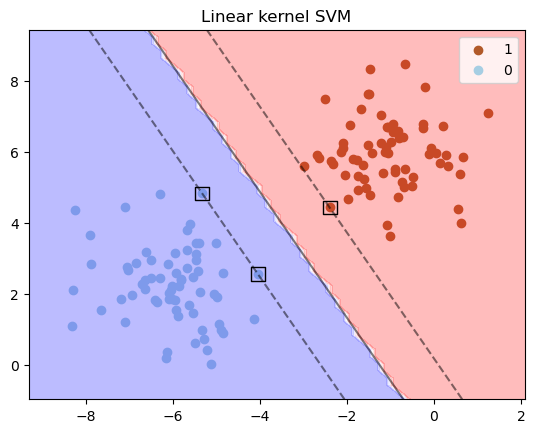

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [11]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

C:\Users\20191678\AppData\Local\Temp\ipykernel_15992\1627056953.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired')
c:\Users\20191678\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\20191678\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


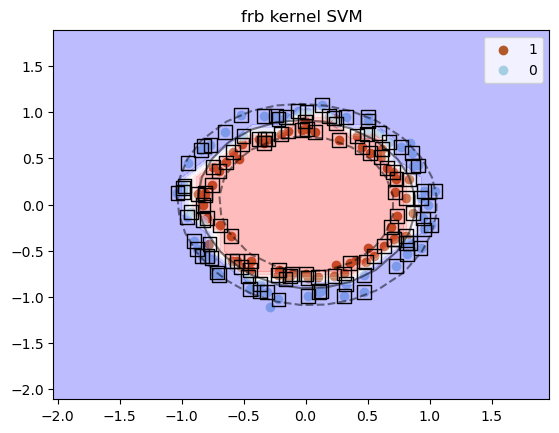

In [12]:
# build the model
model = svm.SVC(kernel='rbf', gamma=0.5, random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('frb kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

<p>A RBF kernel should be used over a linear kernel when the data is not linearly separable. A linear kernel calculates similarities in such a way that its' decision boundary is linear. Thus, a linear kernel is not able to clearly divide data that is not linearly separable. A RBF kernel is able to do so, since it calculates similarieties in such a way that its' decision boundary takes Gaussian form.</p>

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

<p>Yes, we need to normalize the data before using a kernel function. This is because the kernels are similarity functions, which will only take into account features with a long range if the data is not normalized.</p>

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, classification_report


# Prepare the data
X = gene_expression.values
y = drug_response['YM155'].values
y = [0 if x < 0 else 1 for x in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the parameter grid
params = {'C':[1e-2, 1e-1, 1, 10], 'kernel':['linear', 'poly', 'sigmoid', 'rbf'], 'gamma':[1e-2, 1e-1, 1, 10]}


model = svm.SVC()
search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')

search.fit(X_train, y_train)


y_pred = search.predict(X_test)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Precision:")
print(precision)
print("Classification Report:")
print(report)


Precision:
0.375
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.62      0.65      0.63        30
weighted avg       0.77      0.73      0.75        30



## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 


In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
}

model = RandomForestClassifier()
search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

search.fit(X_train, y_train)


y_pred = search.predict(X_test)
report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Precision:")
print(precision)
print("Classification Report:")
print(report)

Precision:
1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.33      0.50         6

    accuracy                           0.87        30
   macro avg       0.93      0.67      0.71        30
weighted avg       0.89      0.87      0.84        30



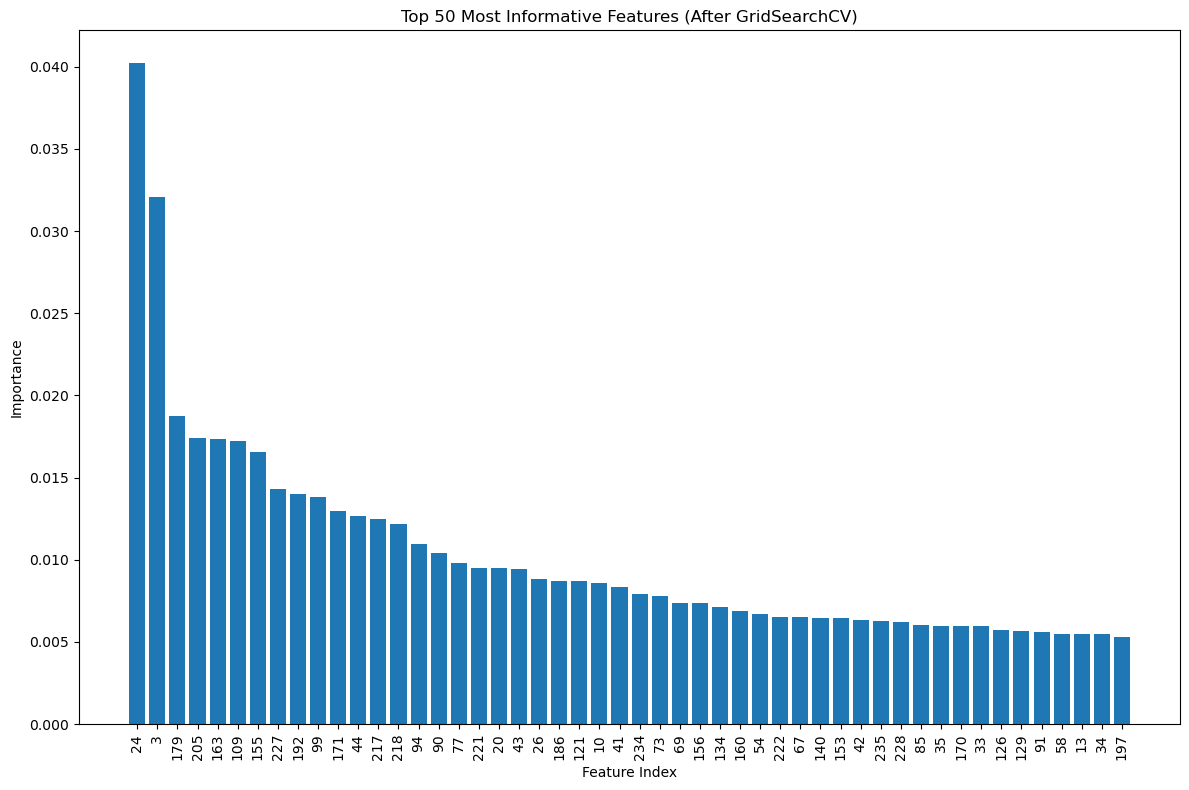

Feature 24, Importance: 0.04020909879251563
Feature 3, Importance: 0.03207869604274799
Feature 179, Importance: 0.01876812175048267
Feature 205, Importance: 0.0174068677998241
Feature 163, Importance: 0.017320077625635522
Feature 109, Importance: 0.017205744294079787
Feature 155, Importance: 0.01656256286708826
Feature 227, Importance: 0.014312686247484455
Feature 192, Importance: 0.01402844285865018
Feature 99, Importance: 0.013814220133050946
Feature 171, Importance: 0.012965221112529669
Feature 44, Importance: 0.01265911293343783
Feature 217, Importance: 0.012470748159417922
Feature 218, Importance: 0.012201942610581136
Feature 94, Importance: 0.01093546106478382
Feature 90, Importance: 0.010385169717438348
Feature 77, Importance: 0.00979823401435141
Feature 221, Importance: 0.009486408067511413
Feature 20, Importance: 0.009475611797341611
Feature 43, Importance: 0.009441281200016742
Feature 26, Importance: 0.008827513198919773
Feature 186, Importance: 0.008696178979079925
Feature 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the best model (best estimator)
best_rf = search.best_estimator_

# Get the feature importances from the best model
importances = best_rf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Select the top 50 most important features
top_n = 50
top_indices = indices[:top_n]

# Create a bar plot for the top 50 features
plt.figure(figsize=(12, 8))
plt.bar(range(top_n), importances[top_indices], align="center")
plt.xticks(range(top_n), top_indices, rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Top 50 Most Informative Features (After GridSearchCV)')
plt.tight_layout()
plt.show()

# Optional: print the top 50 feature indices and their importance
for i in top_indices:
    print(f"Feature {i}, Importance: {importances[i]}")

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

The study we found is:

Biomedical image classification based on a cascade of an SVM with a reject option and subspace analysis \
Dongyun Lina, Lei Sunb, Kar-Ann Tohc, Jing Bo Zhangd, Zhiping Lina


The specific motivation for employing a svm architecture is something along the lines of; 
- its ability to handle high-dimensional data effectively
- its robustness to changes in scale, image blur, and rotation
- the SVM incorporates spatial information using spatial pyramid matching (SPM), which allows for better handling of biomedical patterns with high geometric correspondence, such as shapes and edges.